In [42]:
import numpy as np
import matplotlib.pyplot as pltž

# 1. Vrtilna količina

Izračunajmo vrtilno količino delca z naslednjimi parametri

In [43]:
m = 1 # masa (kg)
r = 1 # radij (m)
omega = 1 # kotna hitrost (1/s)

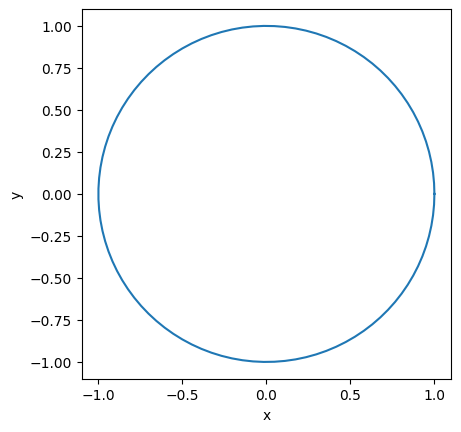

In [44]:
t_array = np.linspace(0, 2*np.pi, 100)
x_array = r*np.cos(omega*t_array)
y_array = r*np.sin(omega*t_array)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_array,y_array)

Vrtilna količina in vztrajnostni moment

Vrtilna količina je podana z enačbo

$$ E_\mathrm{rot} = \frac{I}{2}\omega^2 $$

kjer je vztrajnostni moment

$$ I = \int m(r) r^2 $$

Za točko

In [45]:
I = m*r**2
E_rot = I*omega**2/2

Izračunajte vztrajnostni moment in vrtilno količino naslednjih sistemov (analitično in numerično):

1. Palice dolžine 1 in mase 1 (enakomerno porazdeljene), ki se vrti okoli enega izmed koncev
2. Palice dolžine 1 in mase 1 (enakomerno porazdeljene), ki se vrti okoli sredine
3. Krogle, ki se vrti okoli $z$-osi (masa 1, radij 1, enakomerna gostota)
4. Izdolbljene krogle, ki se vrti okoli $z$-osi (masa 1, zunanji radij 1, notranji radij 0,8, enakomerna gostota) - formule ni potrebno izpleljati analitično, je pa dobra vaja za delo s polarnimi koordinatami


## Palica

$$ E_\mathrm{rot} = \frac{I}{2}\omega^2 = \frac{1}{2}\omega^2\int\mathrm{d}m\, r^2 $$

$$ I = \int\mathrm{d}m\, r^2 \quad\quad\quad \text{z}\quad \mathrm{d}m = \sigma\,\mathrm{d}r \quad\quad\quad \text{in}\quad \sigma = \frac{m}{s}\quad\text{dolžinska gostota} $$

$$ I = \frac{m}{s}\int_0^s\mathrm{d}r\, r^2 $$

$$ I = \frac{m}{s} \frac{1}{3}[r^3]_{r=0}^{r=s}$$

$$ I = \frac{1}{3}ms^2 $$

Analitično

In [46]:
s=1
1/3*m*s**2 / 2 * omega**2

0.16666666666666666

Numerično

In [47]:
num_points = 1000 # razdelimo palico na 1000 koščkov in seštejemo vrtilno količino posameznega koščka
r_list = np.linspace(0,s,num_points)

(m/num_points)/2 * omega**2 * np.sum(r_list**2)

0.16675008341675007

## Palica (vrtenje okoli sredine)

$$ E_\mathrm{rot} = \frac{I}{2}\omega^2 = \frac{1}{2}\omega^2\int\mathrm{d}m\, r^2 $$

$$ I = \int\mathrm{d}m\, r^2 \quad\quad\quad \text{z}\quad \mathrm{d}m = \sigma\,\mathrm{d}r \quad\quad\quad \text{in}\quad \sigma = \frac{m}{s}\quad\text{dolžinska gostota} $$

$$ I = \frac{m}{s}\int_{-s/2}^{s/2}\mathrm{d}r\, r^2 $$

$$ I = \frac{m}{s} \frac{1}{3}[r^3]_{r=-s/2}^{r=s/2} $$

$$ I = \frac{m}{s} \frac{1}{3}\left[\frac{s^3}{8}-\left(-\frac{s^3}{8}\right)\right] $$

$$ I = \frac{1}{12}ms^2 $$

Analitično

In [48]:
s=1

1/12*m*s**2 / 2 * omega**2

0.041666666666666664

Numerično

In [49]:
num_points = 1000
r_list = np.linspace(-s/2,s/2,num_points)

(m/num_points)/2 * omega**2 * np.sum(r_list**2)

0.041750083416750086

## Krogla

$$ E_\mathrm{rot} = \frac{I}{2}\omega^2 = \frac{1}{2}\omega^2\int\mathrm{d}m\, r^2 $$

$$ I = \int\mathrm{d}m\, r^2 \quad\quad\quad \text{z}\quad \mathrm{d}m = \rho\,\mathrm{d}V \quad\quad\quad \text{in}\quad \rho=\frac{m}{V} \quad\text{gostota} $$

$$ I = \frac{m}{V}\int_V\mathrm{d}V\, r^2 $$

uporabimo cilindrične koordinate

$$ I = \frac{m}{V}\int_{z=-R}^{R}\int_{r=0}^{\tilde{R}(z)}\int_{\varphi=0}^{2\pi}\,r\,\mathrm{d}r\mathrm{d}z\mathrm{d}\varphi\, r^2 $$

Izračunamo integral v polarnih koordinatah in uporabimo zamenjavo $ \tilde{R}(z) = \sqrt{R^2-z^2} $

$$ I = \frac{m}{V} \left(\int_{\varphi=0}^{2\pi}\,\mathrm{d}\varphi\right)\, \int_{z=-R}^{R}\int_{r=0}^{\tilde{R}(z)} r^3 \,\mathrm{d}r\mathrm{d}z $$

$$ I = \frac{m}{V} 2\pi\,\int_{z=-R}^{R} \left[\frac{1}{4}r^4\right]_{r=0}^{\sqrt{R^2-z^2}} \,\mathrm{d}z $$

$$ I = \frac{m}{V} 2\pi\,\int_{z=-R}^{R} \frac{1}{4}\left(R^2-z^2\right)^2 \,\mathrm{d}z $$

$$ I = \frac{m}{V} \frac{\pi}{2}\,\int_{z=-R}^{R} \left(R^4-2R^2z^2+z^4\right) \,\mathrm{d}z $$

$$ I = \frac{m}{V} \frac{\pi}{2}\,\left[R^4z-\frac{2}{3}R^2z^3+\frac{1}{5}z^5\right]_{z=-R}^{R} $$

$$ I = \frac{m}{V} \frac{\pi}{2}\,2\left(R^5-\frac{2}{3}R^5+\frac{1}{5}R^5\right) $$

$$ I = \frac{m}{V} \pi\,\frac{8}{15}R^5 $$

uporabimo formulo za volumen krogle $ V = \frac{4}{3}\pi R^3 $

$$ I = m \frac{\frac{8}{15}\pi R^5}{\frac{4}{3}\pi R^3} $$

$$ I = \frac{2}{5}mR^2 $$

Analitično

In [50]:
2/5*m*r**2 / 2 * omega**2

0.2

Numerično

Ideja je, da zgeneriramo veliko točk znotraj kocke s stranicami $2r$ in obdržimo samo tiste, ki so znotraj krogle. S tem dobimo veliko število točk znotraj krogle, katere lahko nato seštejemo (njihove vztrajnostne momente)

In [51]:
num_points = 30

coord_list = [] ### samo za vizualizacijo
counter = 0
contribution = 0

for x in np.linspace(-r,r,num_points):
    for y in np.linspace(-r,r,num_points):
        for z in np.linspace(-r,r,num_points):
            if(np.linalg.norm([x,y,z]) <= r ):
                coord_list.append([x,y,z]) ### samo za vizualizacijo
                counter = counter +1
                contribution = contribution + np.linalg.norm([x,y,0])**2

In [52]:
counter #število zgeneriranih točk znotraj krogle

12712

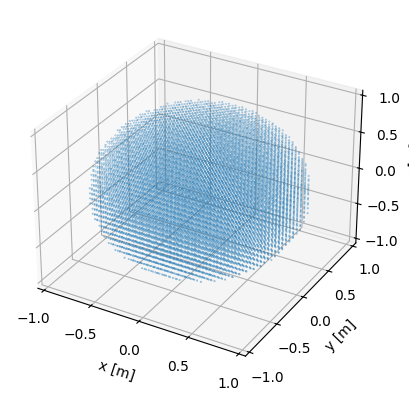

In [53]:
coord_list = np.transpose(coord_list)

plt3D = plt.axes(projection='3d')

plt3D.set_xlabel('x [m]')
plt3D.set_ylabel('y [m]')
plt3D.set_zlabel('z [m]')
plt3D.scatter3D(coord_list[0],coord_list[1],coord_list[2],s=0.1)

In [54]:
(m/counter) * contribution / 2 * omega**2

0.1993827959612327

## Izdolbljena krogla

$$ I = \frac{2}{5}m\frac{r_1^5-r_2^5}{r_1^3-r_2^3} $$

Analitično

In [55]:
r1 = 1
r2 = 0.8

1/2 * omega**2 * 2/5 * m * (r1**5 - r2**5)/(r1**3 - r2**3)

0.27554098360655743

Numerično

In [56]:
num_points = 40

coord_list = [] ### samo za vizualizacijo
counter = 0
contribution = 0

for x in np.linspace(-r,r,num_points):
    for y in np.linspace(-r,r,num_points):
        for z in np.linspace(-r,r,num_points):
            if(r2 <= np.linalg.norm([x,y,z]) <= r1 ):
                coord_list.append([x,y,z]) ### samo za vizualizacijo
                counter = counter +1
                contribution = contribution + np.linalg.norm([x,y,0])**2

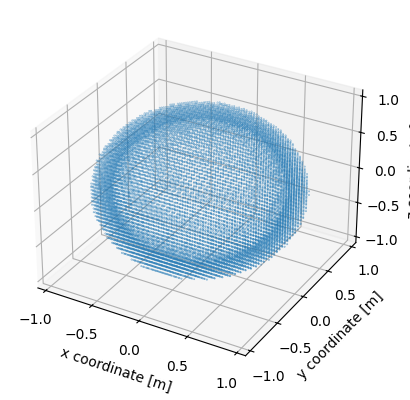

In [57]:
coord_list = np.transpose(coord_list)

plt3D = plt.axes(projection='3d')

plt3D.set_xlabel('x coordinate [m]')
plt3D.set_ylabel('y coordinate [m]')
plt3D.set_zlabel('z coordinate [m]')
plt3D.scatter3D(coord_list[0],coord_list[1],coord_list[2],s=0.1)

In [58]:
(m/counter) * contribution / 2 * omega**2

0.2755370034739556

# 2. Magnetno polje žice

Formula za gostoto električnega polja je podana z (Maxwellove enačbe):

$$ 
\vec{A}(\vec{r})=\frac{\mu_0}{4\pi}\int\frac{\vec{j}(\vec{r}')}{|\vec{r}-\vec{r}'|}\,\mathrm{d}V'\\
$$

iz česar lahko izpeljemo velikost magnetnega polja

$$ 
\vec{B}(\vec{r})=\nabla\times\vec{A}(\vec{r})\\
$$

Izračunajte magnetno polje ravne žice z naslednjimi parametri:

- žica teže po $z$-osi
- zelo dolga
- zelo tanka

Uporabite lahno naslednje parametre:

In [59]:
mu0 = 1

# ravna žica
j0 = 1 # A/m^2
r0 = 0.001 # m
l0 = 1000 # m

Rezultat narišite kot vektorsko polje z uporabo funkcije arrowplot znotraj matplotlib.

Rezultat izpeljite tudi analitično.

In [60]:
def j(r):
        return np.array([0.0, 0.0, j0])

Pripravimo "mesh" za vizualizacijo

In [61]:
coordMax = 4.9
numpoints = 50
d = 2*coordMax / (numpoints-1)

# coordinates: standardno indeksiranje je yxz, spremenimo v xyz z "indexing='ij'"
# imamo ničle v xy ravnini med -coordMax in coordMax z razmikom, katerega definira numpoints
coords = np.array(np.meshgrid(np.linspace(-coordMax, coordMax, numpoints),
                              np.linspace(-coordMax, coordMax, numpoints),
                              np.zeros(1),
                              indexing='ij'
                             ))

In [62]:
# gostota električnega polja (nastavek na meshu - ničle v xy ravnini)

A = np.array(np.meshgrid(np.zeros(numpoints),
                         np.zeros(numpoints),
                         np.zeros(1),
                         indexing='ij'
                        ))

In [63]:
numint = 5001

for ix in np.arange(numpoints):
    for iy in np.arange(numpoints):
        # pozicija r za katero računamo A
        r = np.array([-coordMax+ix*d, -coordMax+iy*d, 0.0])
        for zj in np.linspace(-l0,l0,numint):
            # integriramo za vse rj v žici
            rj = np.array([ 0.0, 0.0, zj ])
            A[:,ix,iy,0] = A[:,ix,iy,0] + j(rj) / np.sqrt( r[0]**2 + r[1]**2 + rj[2]**2 )

In [64]:
dz = (2*l0) / (numint-1)
df = np.pi * r0**2
A = A * mu0 / (4*np.pi) * df * dz

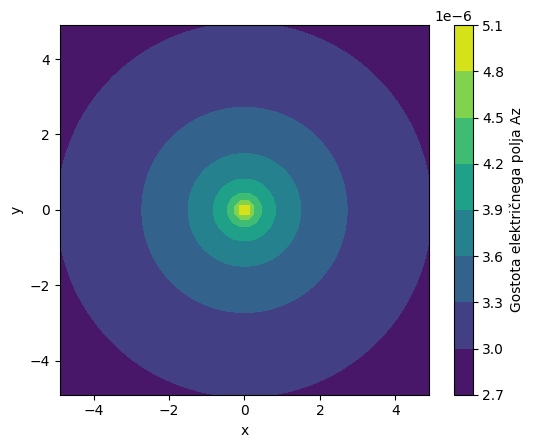

In [65]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.xlabel('x')
plt.ylabel('y')

plt.contourf( coords[0,:,:,0], coords[1,:,:,0], A[2,:,:,0] )
cbar = plt.colorbar()
cbar.set_label('Gostota električnega polja Az')

### Analitična rešitev

$$ \vec{A}(\vec{r}) = \frac{\mu_0}{2\pi}jF\log\frac{2l_0}{\sqrt{x^2+y^2}}\vec{e}_z $$

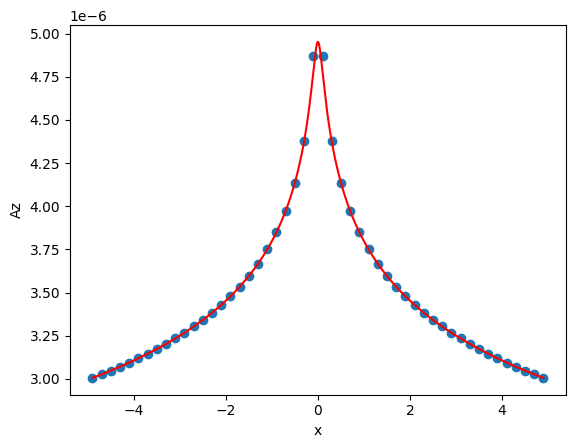

In [66]:
plt.xlabel('x')
plt.ylabel('Az')

plt.scatter(coords[0,:,numpoints//2,0],A[2,:,numpoints//2,0])

xlist = np.linspace(-coordMax,coordMax,10001)
plt.plot(
    xlist,
    mu0/(2*np.pi) * j0 * df * np.log( 2*l0/ np.sqrt( xlist**2 + coords[1,0,numpoints//2,0]**2 ) ),
    'red')

## Magnetno polje

$$
\vec{B}(\vec{r})=\nabla\times\vec{A}(\vec{r})=\begin{pmatrix}
\frac{\partial}{\partial y}A_z(\vec{r}) - \frac{\partial}{\partial z}A_y(\vec{r})\\
\frac{\partial}{\partial z}A_x(\vec{r}) - \frac{\partial}{\partial x}A_z(\vec{r})\\
\frac{\partial}{\partial x}A_y(\vec{r}) - \frac{\partial}{\partial y}A_x(\vec{r})\\
\end{pmatrix}=\begin{pmatrix}
\frac{\partial}{\partial y}A_z(\vec{r})\\
 - \frac{\partial}{\partial x}A_z(\vec{r})\\
\frac{\partial}{\partial x}A_y(\vec{r}) - \frac{\partial}{\partial y}A_x(\vec{r})\\
\end{pmatrix}\\
$$

Gostota električnega polja se spreminja samo v xy ravnini in je konstantna glede na $z$ (za neskončno žico), velja

$$ 
\frac{\partial }{\partial z} A_x(\vec{r}) = \frac{\partial }{\partial z} A_y(\vec{r}) = 0
$$

In [67]:
# nastavek ničel za magnetno polje

B = np.array(np.meshgrid(np.zeros(numpoints),
                         np.zeros(numpoints),
                         np.zeros(1),
                         indexing='ij'
                        ))

In [73]:
B[0,1:-1,1:-1,0] = (A[2,1:-1,2:,0] - A[2,1:-1,:-2,0]) / (2*d)
B[1,1:-1,1:-1,0] =-(A[2,2:,1:-1,0] - A[2,:-2,1:-1,0]) / (2*d)
B[2,1:-1,1:-1,0] = (A[1,2:,1:-1,0] - A[1,:-2,1:-1,0]) / (2*d) - (A[0,1:-1,2:,0] - A[0,1:-1,:-2,0]) / (2*d)

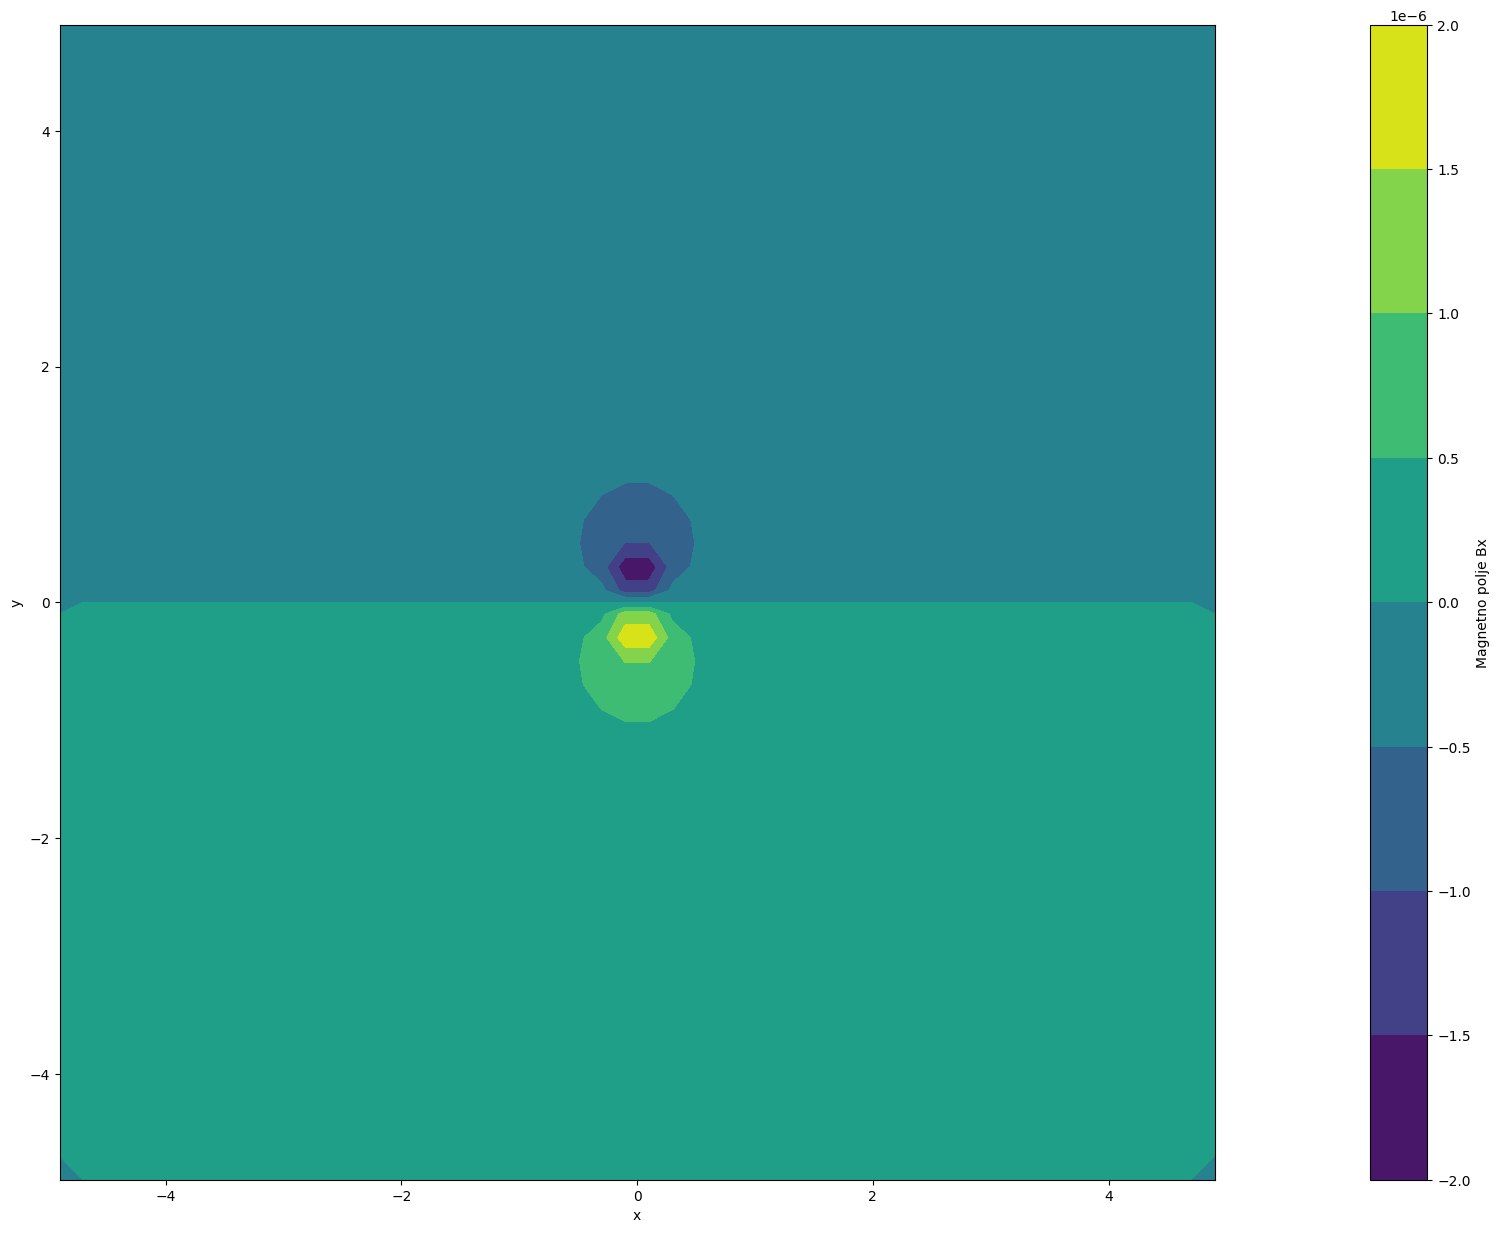

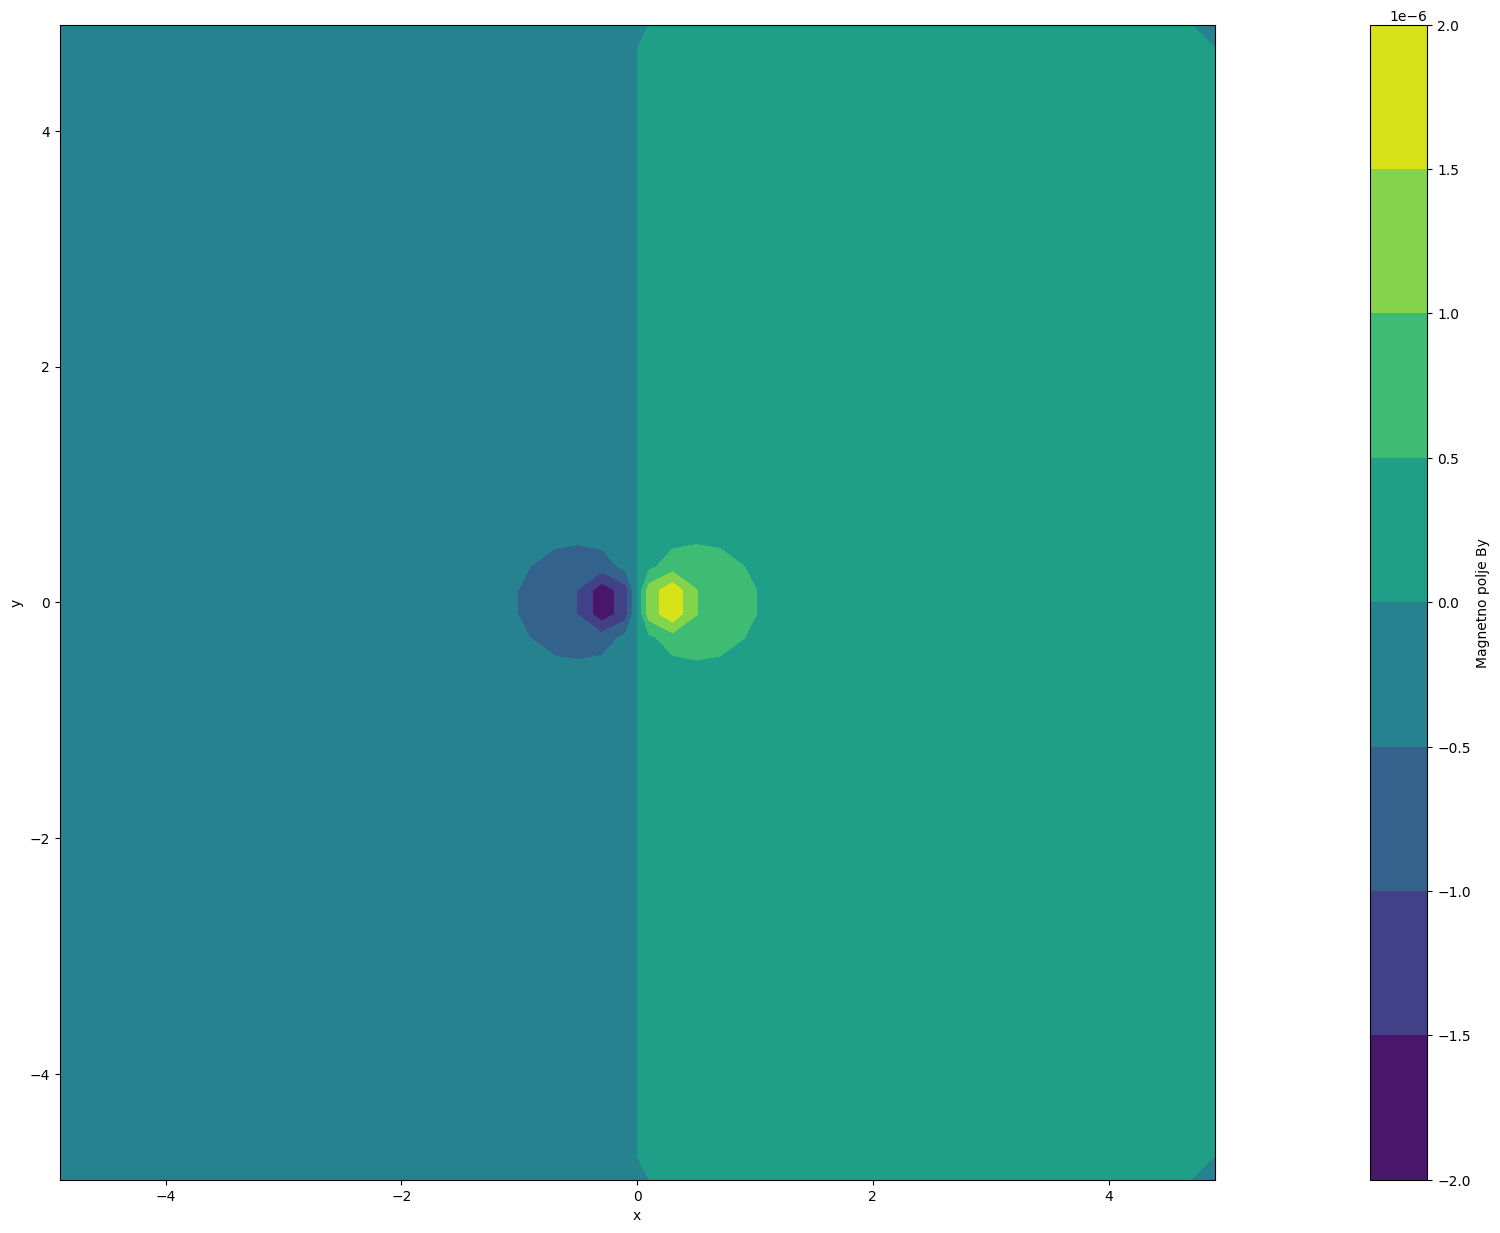

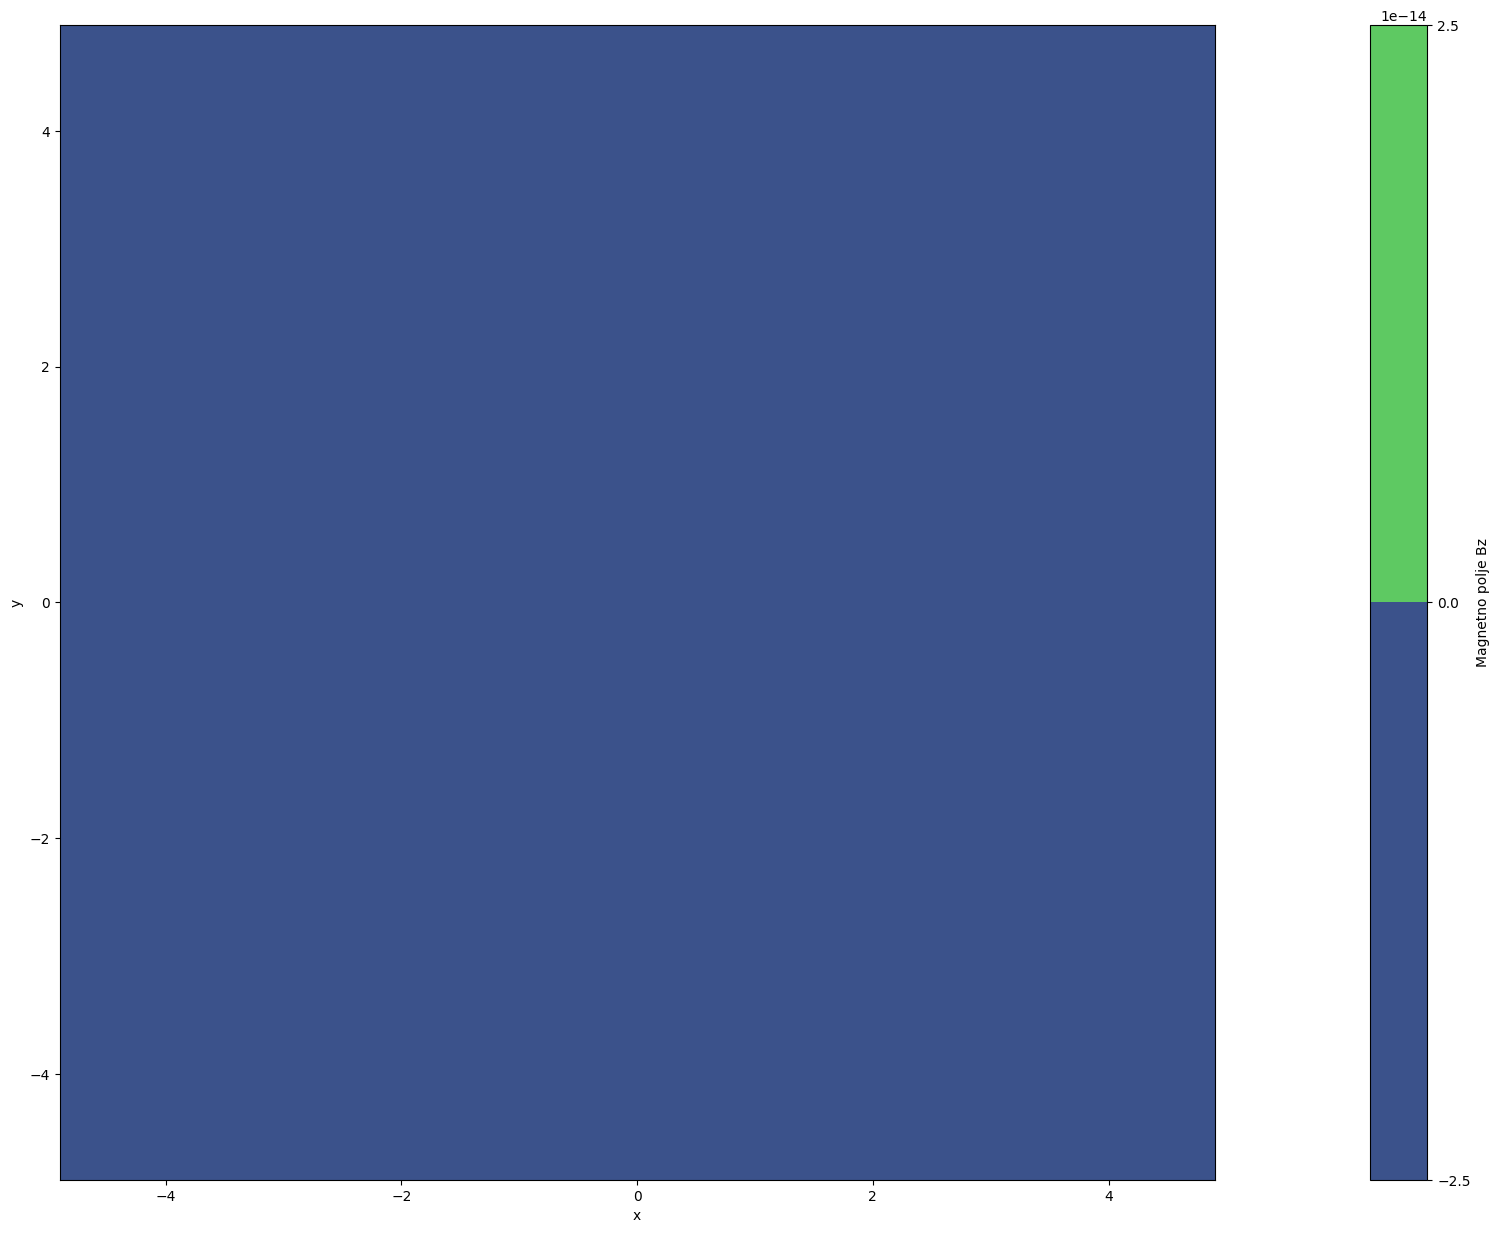

In [74]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.xlabel('x')
plt.ylabel('y')
plt.contourf( coords[0,:,:,0], coords[1,:,:,0], B[0,:,:,0] )
cbar = plt.colorbar()
cbar.set_label('Magnetno polje Bx')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.xlabel('x')
plt.ylabel('y')
plt.contourf( coords[0,:,:,0], coords[1,:,:,0], B[1,:,:,0] )
cbar = plt.colorbar()
cbar.set_label('Magnetno polje By')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.xlabel('x')
plt.ylabel('y')
plt.contourf( coords[0,:,:,0], coords[1,:,:,0], B[2,:,:,0] )
cbar = plt.colorbar()
cbar.set_label('Magnetno polje Bz')
plt.show()

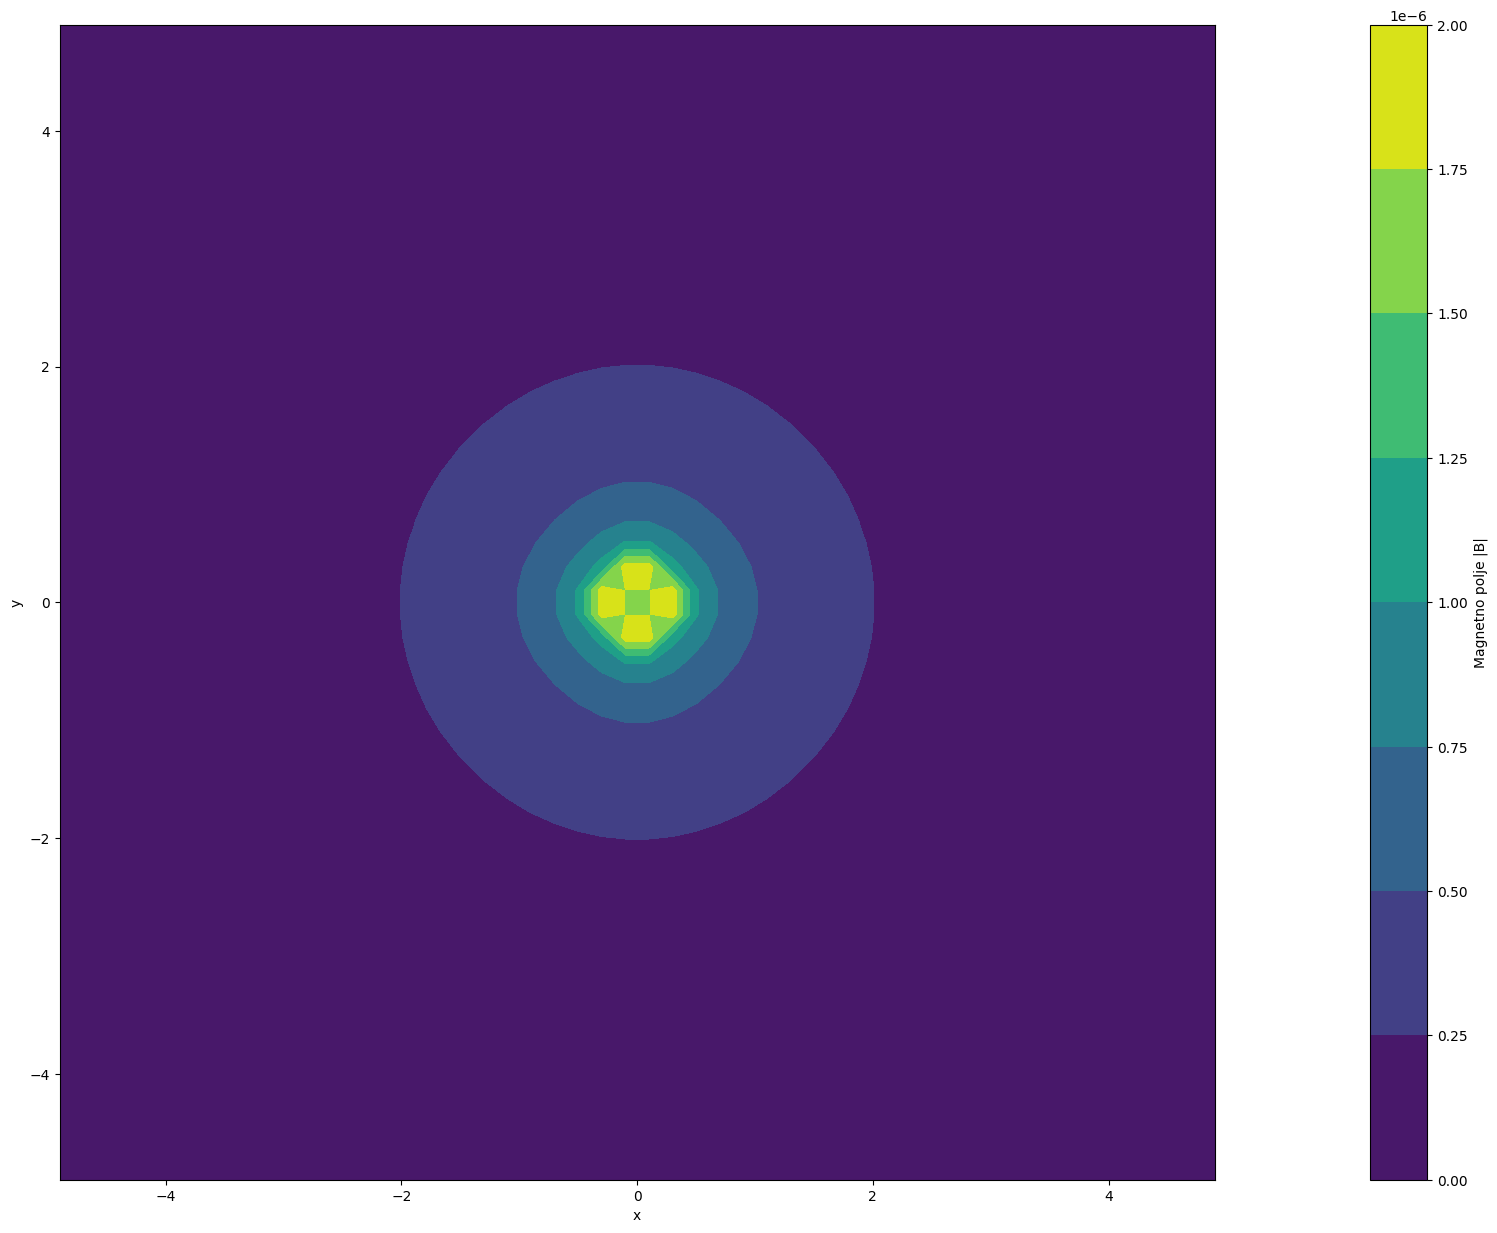

In [75]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)
plt.xlabel('x')
plt.ylabel('y')
plt.contourf( coords[0,:,:,0], coords[1,:,:,0], np.sqrt( B[0,:,:,0]**2 + B[1,:,:,0]**2 + B[2,:,:,0]**2 ) )
cbar = plt.colorbar()
cbar.set_label('Magnetno polje |B|')
plt.show()

### Analitična rešitev

$$ \vec{B}(\vec{r}) = \frac{\mu_0}{2\pi}jF\frac{1}{\sqrt{x^2+y^2}}\begin{pmatrix}-y\\x\\0\end{pmatrix} $$

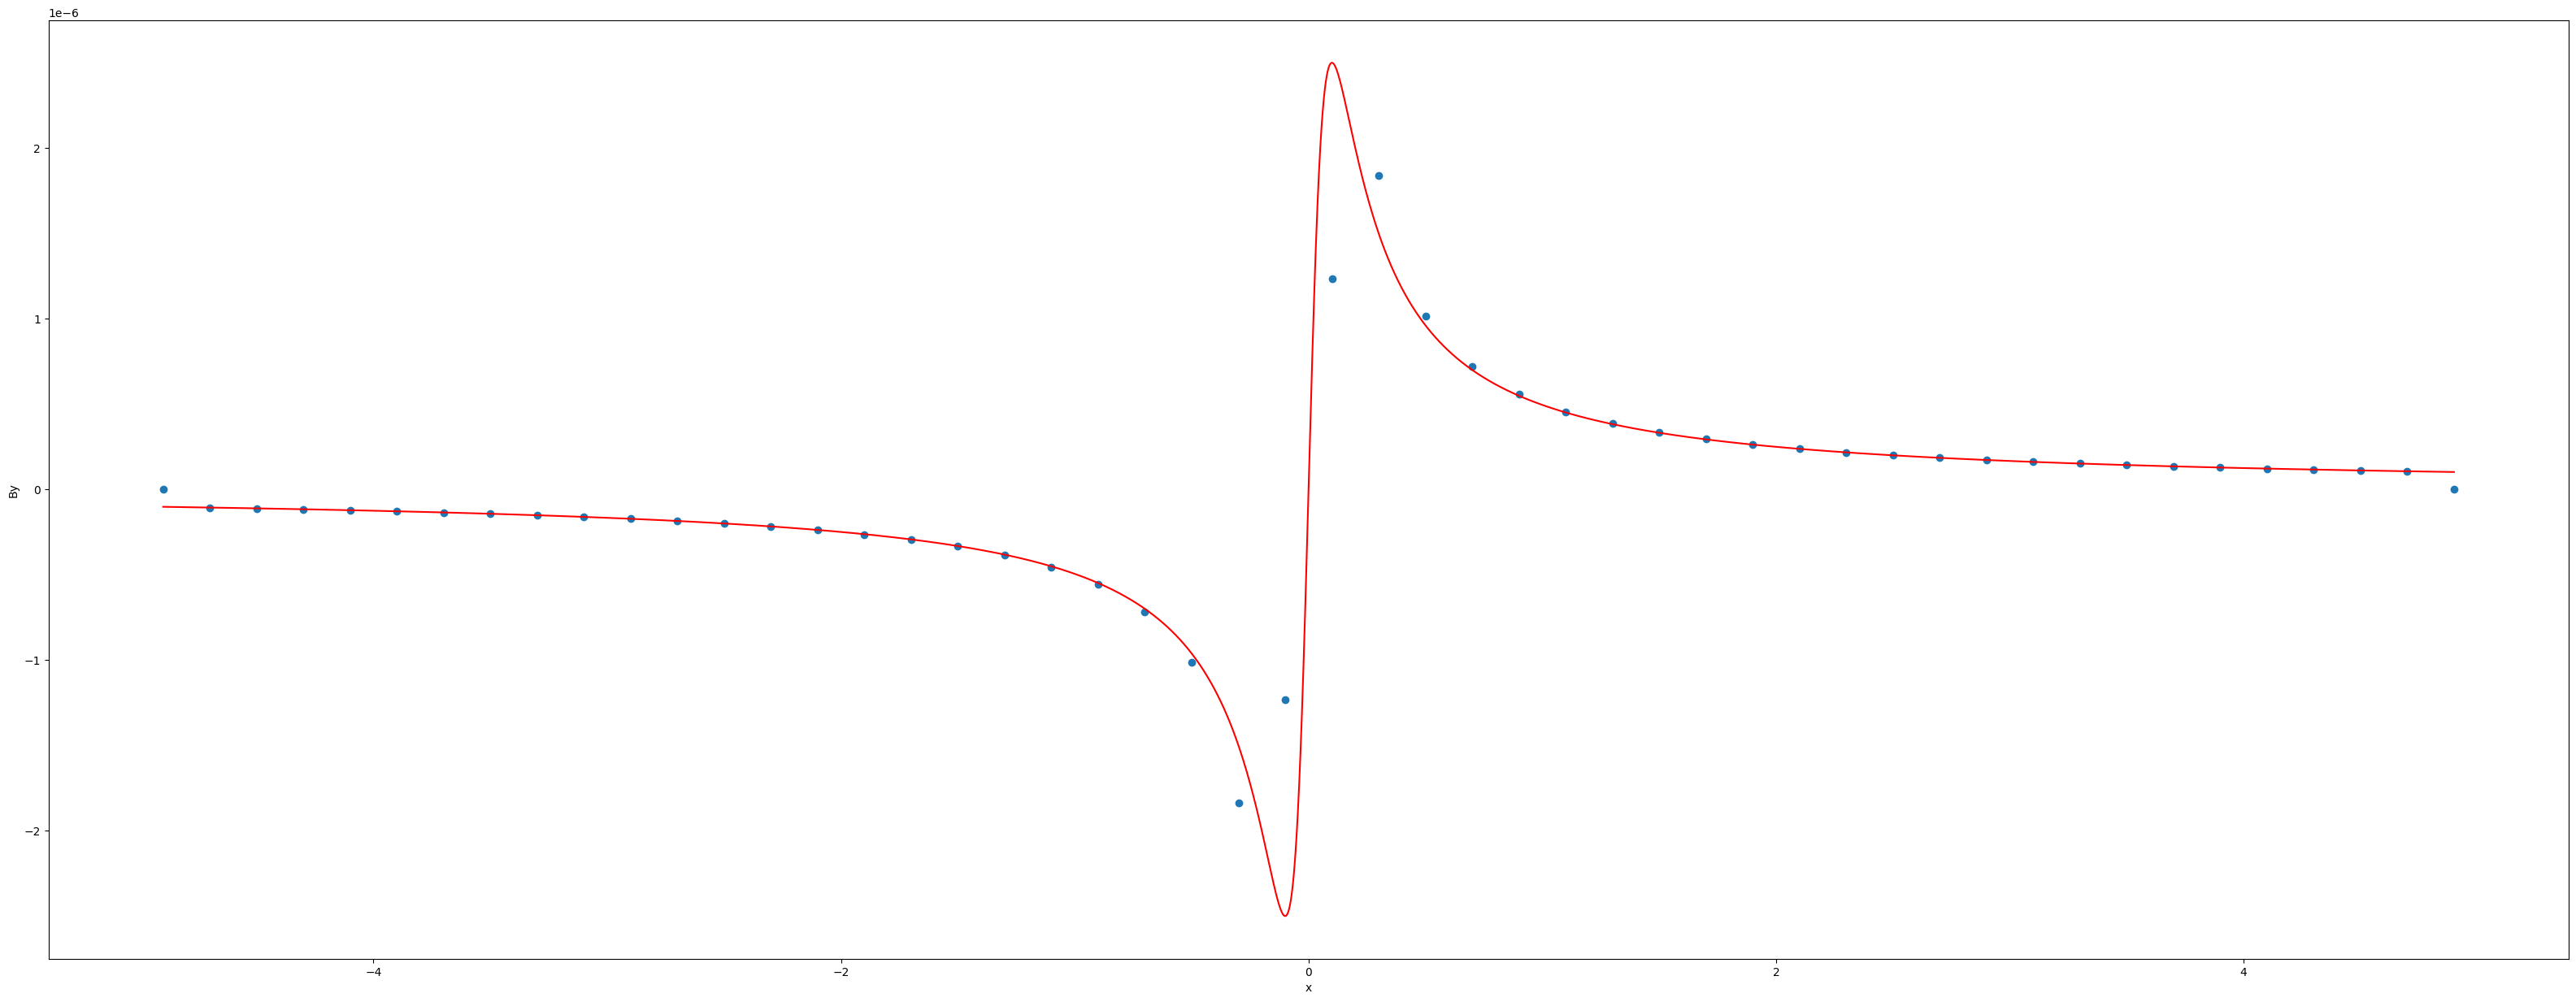

In [76]:
plt.xlabel('x')
plt.ylabel('By')

plt.scatter(coords[0,:,numpoints//2,0],B[1,:,numpoints//2,0])

xlist = np.linspace(-coordMax,coordMax,10001)
plt.plot(
    xlist,
    mu0/(2*np.pi) * j0 * df / np.sqrt( xlist**2 + coords[1,0,numpoints//2,0]**2 )**2 * xlist,
    'red')

In [77]:
# Spremenimo standardno velikost objektov figure v tem notebooku
plt.rcParams['figure.figsize'] = [40, 15]

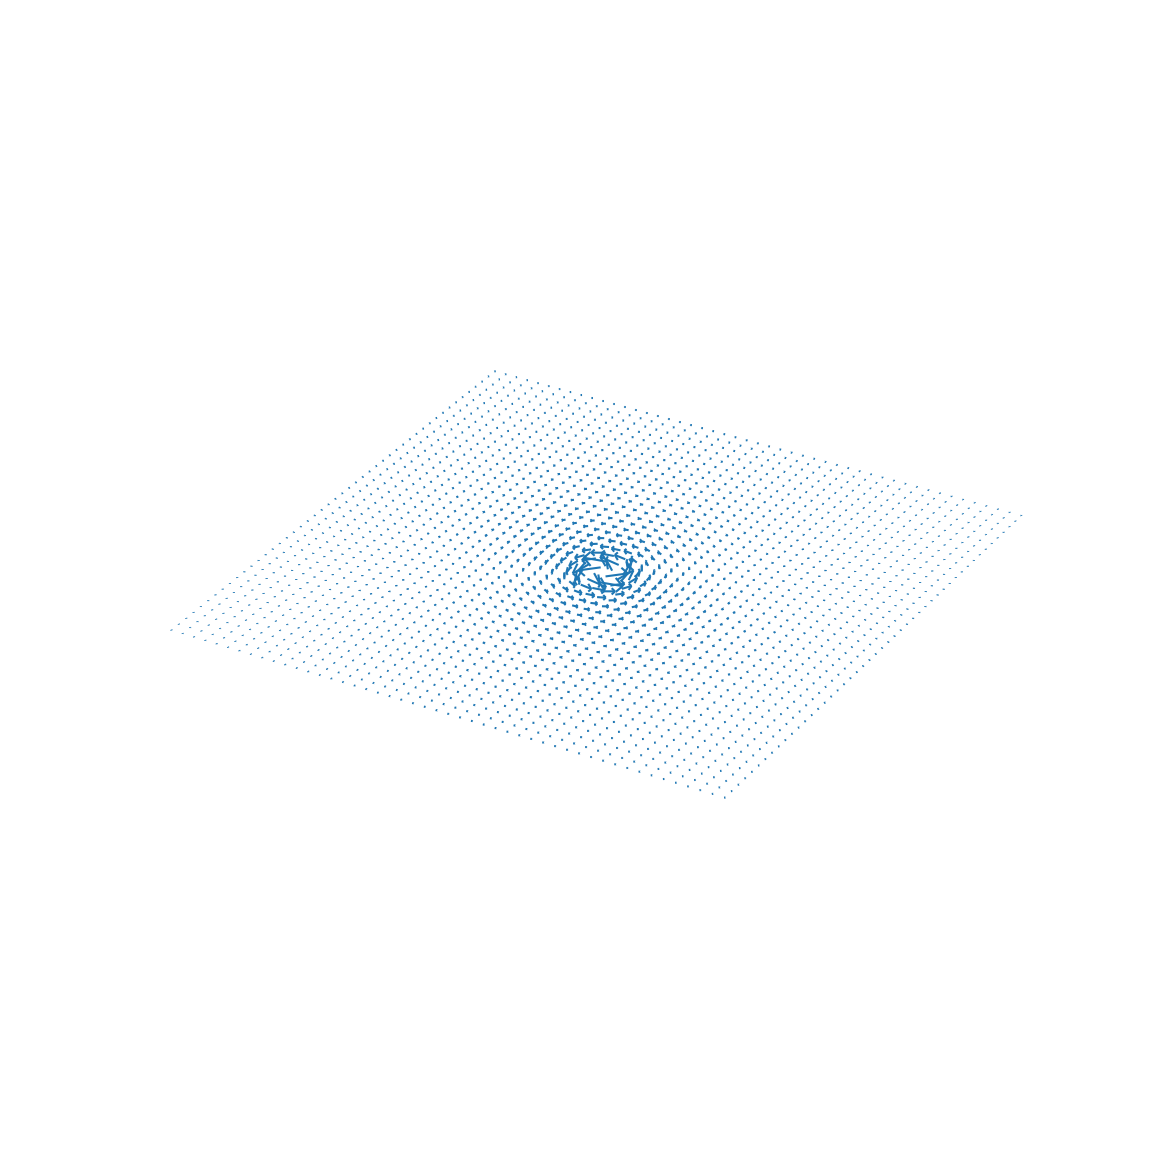

In [78]:
arrowplot = plt.axes(projection='3d')
arrowplot.set_zlim([-1,1])

# background invisible
arrowplot.axis(False)

scale = 0.2e6
arrowplot.quiver(
    coords[0],coords[1],coords[2],
    B[0]*scale,B[1]*scale,B[2]*scale,
)